# Задача 1. 4 балла. #

Необходимо подготовить (предобработать) запись с микрофона плохого качества для дальнешей передачи в модель распознавания речи. Обработка должна вести к повышению качества распознавания (большее соответствие произнесенным словам). Необходимо подготовить решение осуществляющее предобработку аудиозаписей и их дальнейшее распознавание. ть слов

## Входные данные: ##
Аудиозаписи: download_14.mp4, download_16.mp4


## Выходные данные: ##  
Последовательность слов

Конвертировал download_14.mp4, download_16.mp4 в download_14.wav, download_16.wav соответственно


In [1]:
import wave
import sys
import json
from vosk import Model, KaldiRecognizer, SetLogLevel

In [2]:
wf1 = wave.open("download_16.wav", "rb")

In [3]:
# You can also init model by name or with a folder path
model = Model(model_name="vosk-model-ru-0.42")
# model = Model("models/en")

rec = KaldiRecognizer(model, wf1.getframerate())
rec.SetWords(True)
rec.SetPartialWords(True)

In [4]:
while True:
    data = wf1.readframes(4000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        pass
    else:
        pass

In [5]:
output = json.loads(rec.FinalResult())

In [6]:
out = output["text"]

In [7]:
out

'сами разговаривали бегали решили не дальше первого июля и подорожать а тогда выпить чист по данным бюро и говорит'

In [8]:
wf = wave.open("download_14.wav", "rb")

In [9]:
rec1 = KaldiRecognizer(model, wf.getframerate())
rec1.SetWords(True)
rec1.SetPartialWords(True)

In [10]:
while True:
    data = wf.readframes(4000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        pass
    else:
        pass

In [11]:
output1 = json.loads(rec1.FinalResult())

In [12]:
out1 = output1["text"]

In [13]:
out1

''

# Задача 2. 3 балла. #

На массиве изображений с автомобилями необходимо определить их цвет в пространстве RGB. Если на изображении несколько автомобилей, необходимо определить цвет для каждого. 

Используя открытые источники сформировать и подготовить выборку изображений с автомобиля до 255) 

## Входные данные: ##
Изображение

## Выходные данные: ##
Список кортежей, каждый из которых содержит значения каналов RGB (три целых числа от 0 до 255)

In [17]:
import os
import numpy as np
from PIL import Image 

In [18]:
total_con = os.listdir('cars')

In [22]:
for con in total_con:
    img = np.asarray(Image.open('cars/' + con).convert('RGB'))
    print(img)

[[[ 99 110 140]
  [101 112 142]
  [101 115 144]
  ...
  [175 145 145]
  [179 143 145]
  [135  95  96]]

 [[ 97 108 138]
  [ 99 110 140]
  [ 99 113 142]
  ...
  [175 147 146]
  [174 140 141]
  [118  79  82]]

 [[ 95 106 136]
  [ 96 107 137]
  [ 96 110 139]
  ...
  [171 145 144]
  [171 139 140]
  [116  80  82]]

 ...

 [[142 149 178]
  [148 155 184]
  [150 159 190]
  ...
  [232 228 227]
  [231 227 226]
  [229 225 224]]

 [[145 150 179]
  [147 152 181]
  [147 154 183]
  ...
  [231 227 228]
  [229 225 226]
  [227 223 224]]

 [[149 154 183]
  [142 147 176]
  [134 141 169]
  ...
  [225 221 222]
  [223 219 220]
  [222 218 219]]]
[[[ 22  21  63]
  [ 21  19  58]
  [ 18  12  46]
  ...
  [  5   3   8]
  [  6   1   7]
  [  6   1   7]]

 [[ 16  15  55]
  [ 17  13  50]
  [ 14   7  40]
  ...
  [ 22  20  25]
  [ 23  18  24]
  [ 22  17  23]]

 [[ 26  24  61]
  [ 27  23  56]
  [ 23  16  47]
  ...
  [ 36  34  39]
  [ 37  32  38]
  [ 37  32  38]]

 ...

 [[162 188 189]
  [163 189 190]
  [165 191 192]
  ..

UnidentifiedImageError: cannot identify image file 'cars/archive.zip'

# Задача 3. 7 баллов. #

Необходимо распознать весь печатный текст на изображении, которое представляет собой фото или скан документа. В качестве примера допускается использование изображений в свободном доступе.

## Входные данные: ##
Изображение

## Выходные данные: ##
Список строк

In [25]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [26]:
# читать изображение с помощью OpenCV
image = cv2.imread("test.jpg")
# или вы можете использовать подушку
# image = Image.open("test.png")

In [35]:
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [36]:
# получаем строку
string = pytesseract.image_to_string(image)
# печатаем
print(string)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



# Задача 4. 6 баллов. #

Используя открытые источники и наборы данных решить задачу классификации намерений пользователя. В качестве входных данных поступают реплики пользователя (на русском языке), которые необходимо отнести к одному из классов. Код должен быть организован в соответствиями с требованиями архитектуры, используя ООП парадигму. Библиотека реализации на усмотрение соискателя. 

Дополнением будет реализация поиска «слотов» в рамках интента или реализация механизма их извлечения. 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
import pickle as p
from string import punctuation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.text import Tokenizer as token
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re
import xgboost

AttributeError: module 'inspect' has no attribute 'ArgSpec'

In [43]:
df = pd.read_csv('data.csv')

In [44]:
df

,Review,Rating
0,3D Touch просто восхитительная вещь! Заряд дер...,5
1,"Отключается при температуре близкой к нулю, не...",4
2,"В Apple окончательно решили не заморачиваться,...",3
3,Постарался наиболее ёмко и коротко описать все...,4
4,Достойный телефон. Пользоваться одно удовольст...,5
...,...,...
458428,"удобный, всё работает отлично, звонит, играет,...",5
458429,"прошло больше года, притензий нет, при моей на...",5
458430,мой первый аппарат на андроиде. На данный моме...,5
458431,Разбил iphone и не было желания покупать новый...,5


<Axes: xlabel='Rating', ylabel='count'>

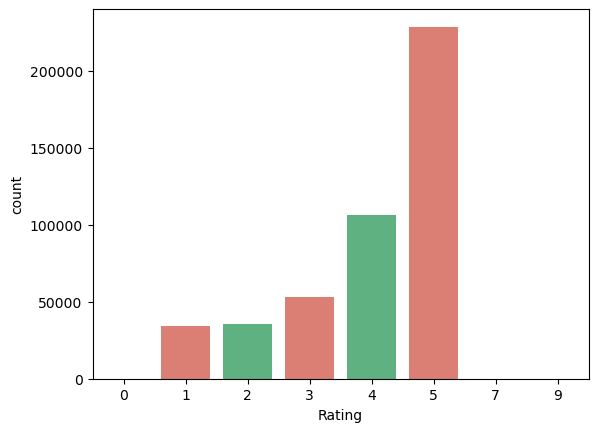

In [45]:
green = '#52BE80'
red = '#EC7063'
sns.countplot(x=df['Rating'], palette=[green, red])